### Sprint Review III

¿Qué logramos en este sprint?:
- Lenguaje_prog
- Salario_max (casi lo hemos conseguido categorizar)
- Varias visualizaciones (gráficas)
- Separar salarios por países
- Importar la librería de europa y filtrar los datos por Europa
- Profundizar en las preguntas y aproximarnos a la elaboración de dataframes al respecto de ellas

In [340]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import sidetable
import re 

In [341]:
df = pd.read_pickle("data/data_limpieza.pickle")

In [342]:
df.shape

(25973, 22)

In [343]:
df.isnull().sum()*100/df.shape[0]

level_0                   0.000000
index                     0.000000
time                      0.000000
age                       0.000000
gender                    0.000000
pais                      0.000000
formacion                 0.000000
puesto                    0.000000
experiencia_prog          0.000000
lenguaje_top              3.977207
exp_ml                    8.543487
tamaño_empresa           37.431179
uso_ml                   38.582374
salario                  40.742309
inversion_ml             41.543141
ppal_herramienta_data    28.814538
lenguaje_prog             3.973357
plataforma                4.000308
plat_cursos              30.189042
nubes                    64.671005
plataforma_top           87.960574
salario_max              40.742309
dtype: float64

#### Histograma por puestos segun especialidad


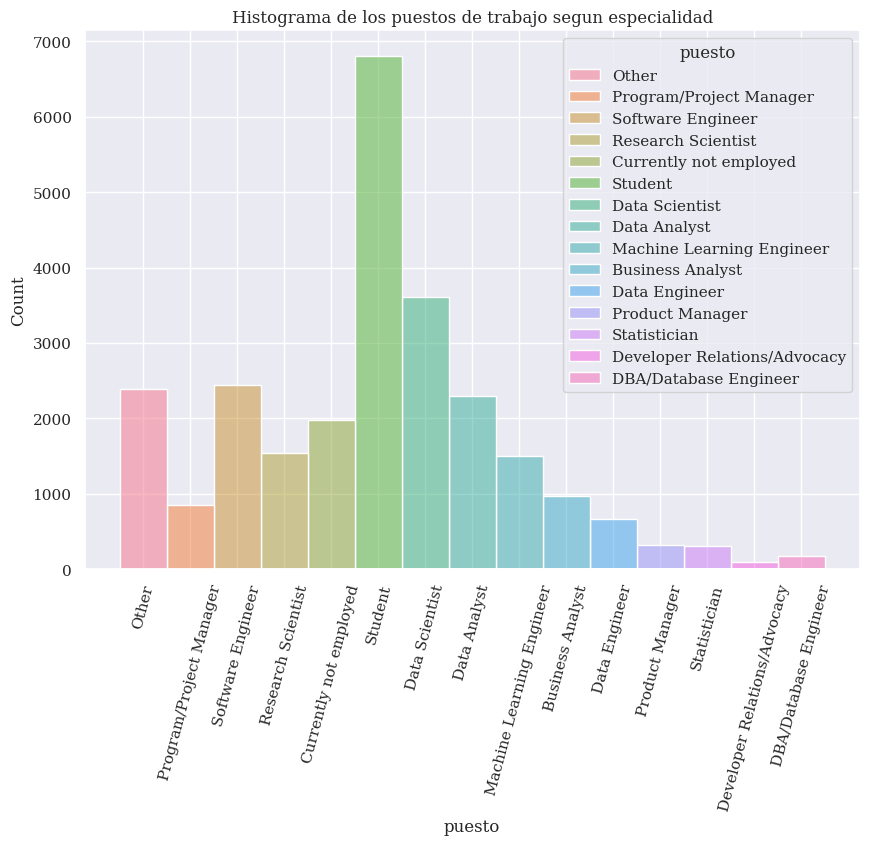

In [344]:
plt.figure(figsize =(10,7))

fig = sns.histplot(x=df['puesto'], data = df, hue = 'puesto', kde=True)
fig.set_title('Histograma de los puestos de trabajo segun especialidad')
plt.xticks(rotation= 75)

plt.show()

#### Counplot por sexos segun especialidad

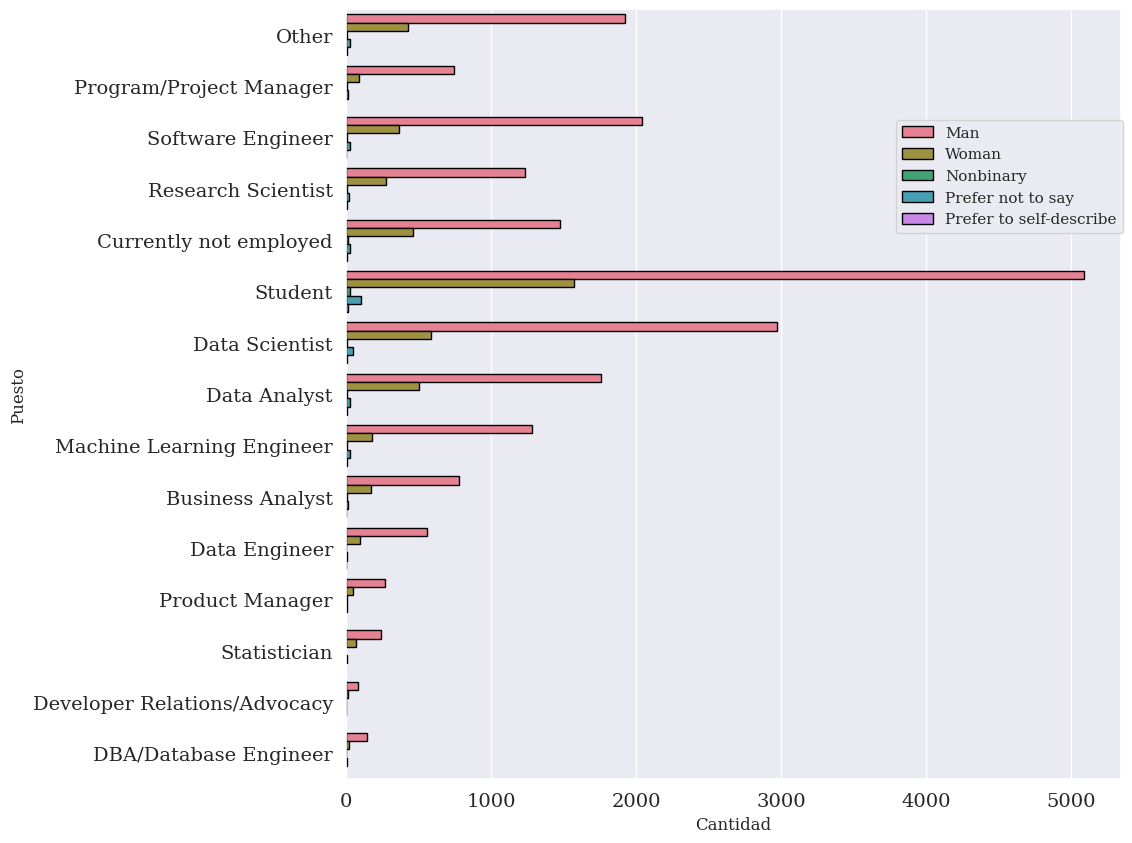

In [345]:
plt.figure(figsize = (10, 10))

fig = sns.countplot(data = df, y = "puesto", hue = "gender", palette = "husl", edgecolor = "black")
fig.set(xlabel = "Cantidad", ylabel = "Puesto")

sns.set(font = "serif")

plt.legend(bbox_to_anchor = (0.7, 0.7))
plt.xlabel("Cantidad", fontsize = 20, font = "serif")
plt.ylabel("Puesto", fontsize = 20, font = "serif")

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14);

#### Counplot por puesto segun la formacion

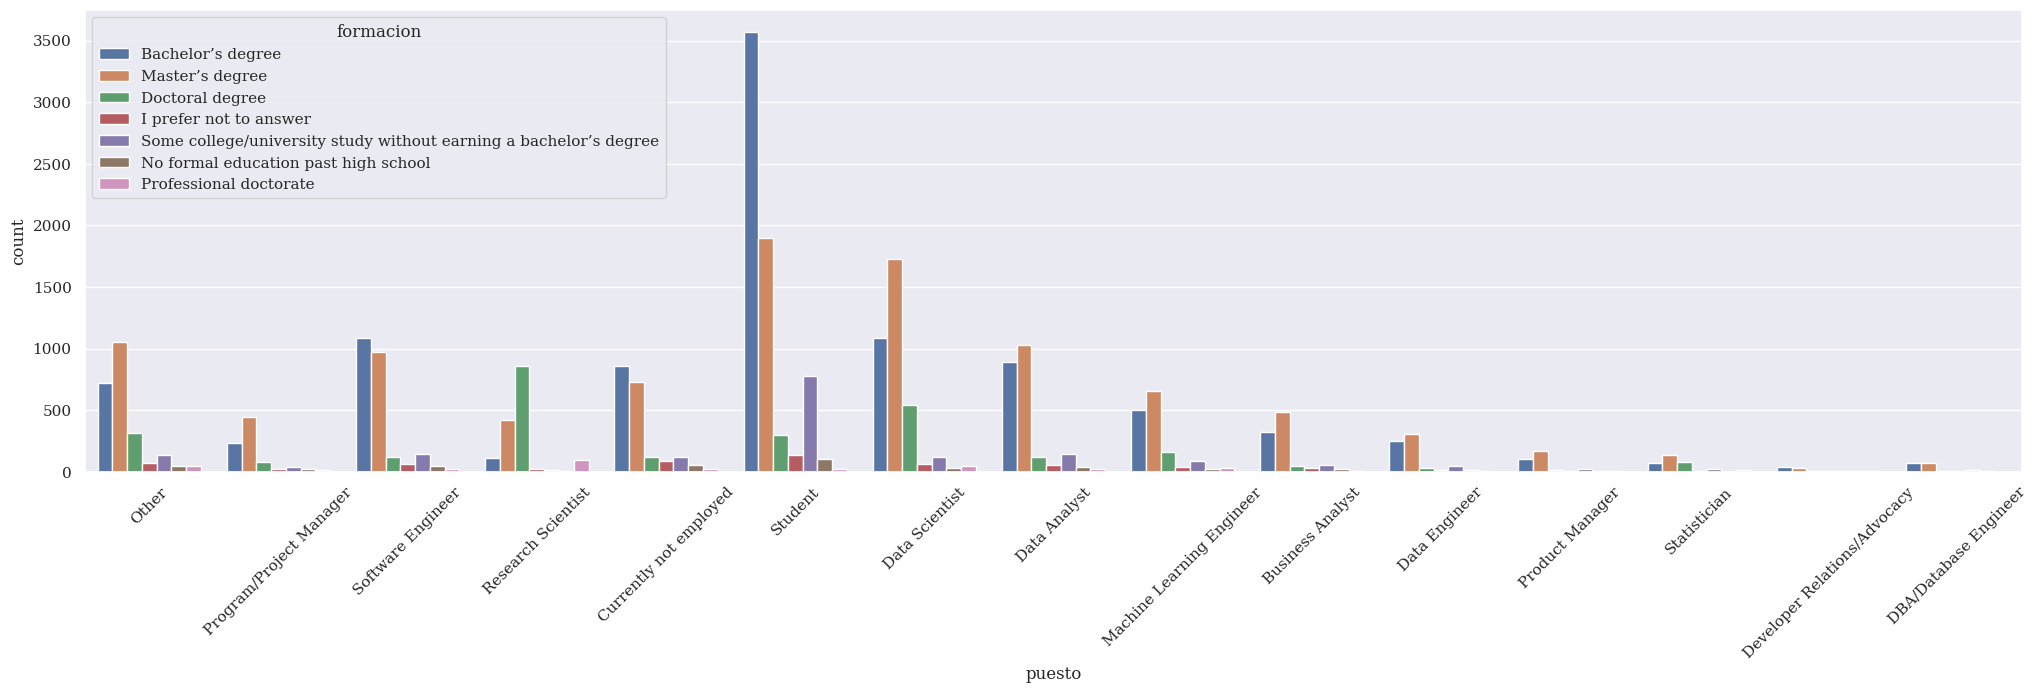

In [346]:
plt.figure( figsize=(25,6))

fig = sns.countplot(x = 'puesto', data = df, hue= 'formacion')
plt.xticks(rotation = 45)

plt.show(); 

#### Counplot por puesto segun herramientas data

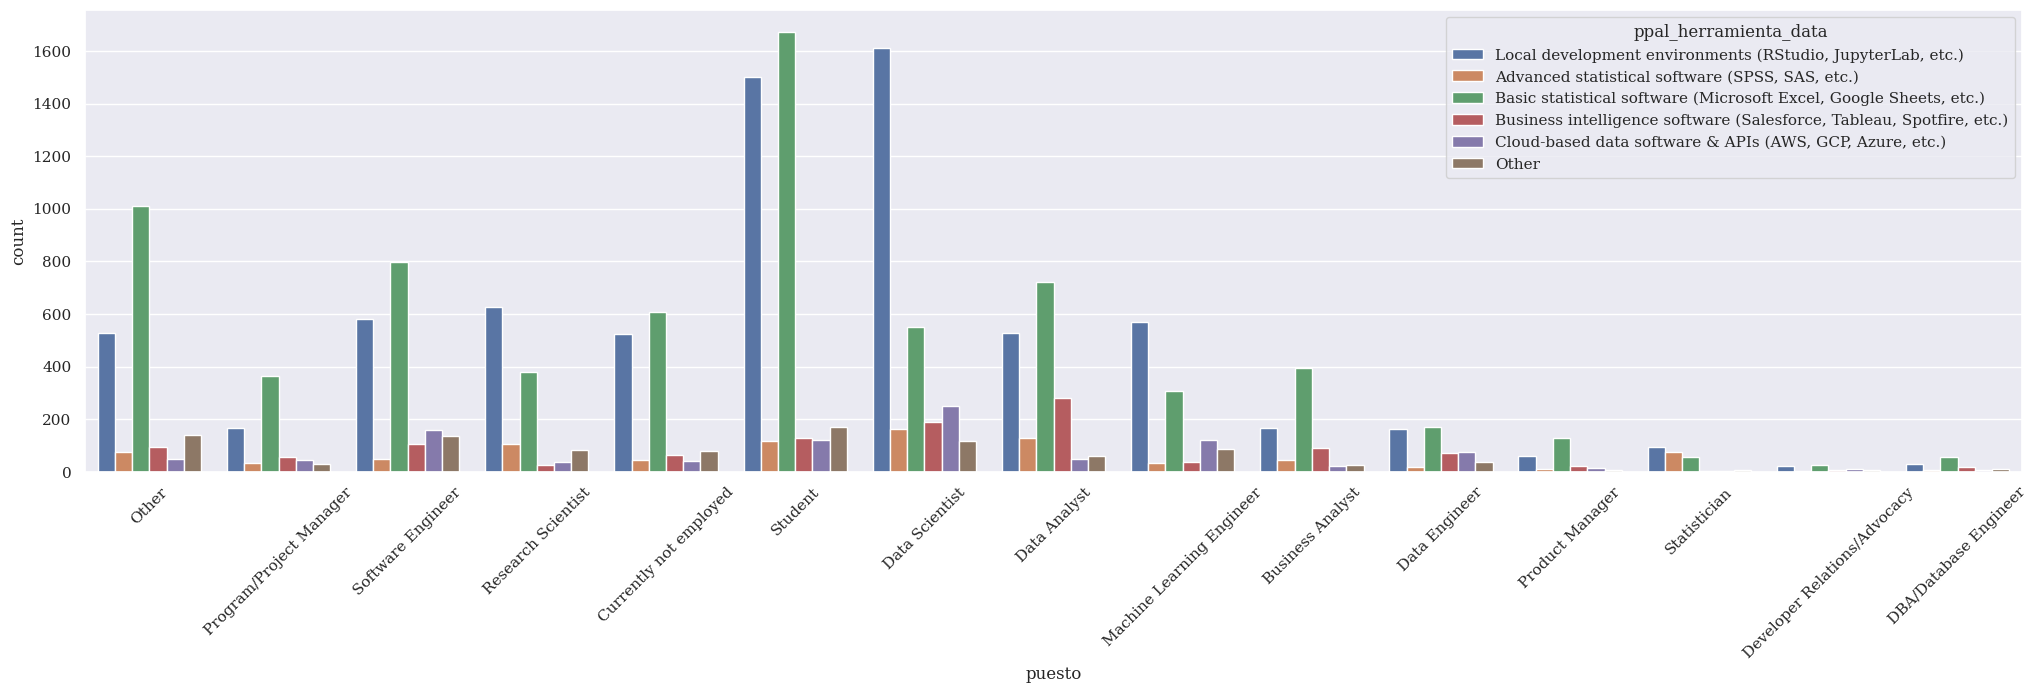

In [347]:
plt.figure( figsize=(25,6))

fig = sns.countplot(x = 'puesto', data = df, hue= 'ppal_herramienta_data')

plt.xticks(rotation = 45)
plt.show(); 

----

#### Comenzamos a analizar la columna lenguaje_prog:

In [348]:
df.lenguaje_prog.value_counts()

Python                                                      4740
Python, SQL                                                 2374
Python, R, SQL                                              1160
Python, R                                                    955
Python, C++                                                  707
                                                            ... 
 R, SQL, C, Java, MATLAB                                       1
 R, SQL, C, Java                                               1
 R, C++, Java, Javascript, MATLAB                              1
Python, R, SQL, C++, Javascript, Julia, MATLAB                 1
Python, R, C, C++, Java, Javascript, Julia, Bash, MATLAB       1
Name: lenguaje_prog, Length: 825, dtype: int64

In [349]:
print(df["lenguaje_prog"].isnull().sum())


1032


In [350]:
df_lenguajeprog_sinnulos = df.copy()

In [351]:
df_lenguajeprog_sinnulos["lenguaje_prog"].replace(np.nan,"unknown",inplace=True)

In [352]:
df_lenguajeprog_sinnulos.isnull().sum()

level_0                      0
index                        0
time                         0
age                          0
gender                       0
pais                         0
formacion                    0
puesto                       0
experiencia_prog             0
lenguaje_top              1033
exp_ml                    2219
tamaño_empresa            9722
uso_ml                   10021
salario                  10582
inversion_ml             10790
ppal_herramienta_data     7484
lenguaje_prog                0
plataforma                1039
plat_cursos               7841
nubes                    16797
plataforma_top           22846
salario_max              10582
dtype: int64

In [353]:
df_lenguajeprog_sinnulos['Lenguaje']= df_lenguajeprog_sinnulos["lenguaje_prog"].apply(lambda x: x.split(',')) 

     Una vez categorizados los nulos ya podemos separar la columna

In [354]:
df_lenguajeprog_sinnulos.head(2)

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,exp_ml,tamaño_empresa,uso_ml,salario,inversion_ml,ppal_herramienta_data,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top,salario_max,Lenguaje
0,0,0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,50-249 employees,No (we do not use ML methods),25000-29999,$100-$999,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"edX,Kaggle Learn Courses,DataCamp,Udacity,Udemy","GitHub , Kaggle",NaN,29999,"[Python, R]"
1,1,1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,< 1 year,"1000-9,999 employees",We are exploring ML methods (and may one day p...,60000-69999,$0 ($USD),"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook","Kaggle Learn Courses,Cloud-certification progr...",NaN,NaN,69999,"[ SQL, C, C++, Java]"


       Esta funcion nos ha creado una sola columna con una lista de valores.
       Decidimos separar cada respuesta en  una columna separada.

In [355]:
df_lenguajeprog_sinnulos[['1','2','3','4','5','6','7','8','9','10','11','12']] = df_lenguajeprog_sinnulos["lenguaje_prog"].str.split(',', expand=True, n=-1)

In [356]:
pd.options.display.max_columns=None
df_lenguajeprog_sinnulos.sample(5)

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,exp_ml,tamaño_empresa,uso_ml,salario,inversion_ml,ppal_herramienta_data,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top,salario_max,Lenguaje,1,2,3,4,5,6,7,8,9,10,11,12
10251,10251,10251,739,30-34,Man,United Kingdom of Great Britain and Northern I...,Master’s degree,Data Analyst,10-20 years,Python,4-5 years,250-999 employees,"We recently started using ML methods (i.e., mo...",60000-69999,$1-$99,"Business intelligence software (Salesforce, Ta...","Python, SQL","PyCharm , Spyder, Sublime Text,Jupyter Notebook",Fast.ai,I do not share my work publicly,NaN,69999,"[Python, SQL]",Python,SQL,None,None,None,None,None,None,None,None,None,None
19345,19345,19345,7124,30-34,Man,Argentina,Master’s degree,Data Scientist,3-5 years,Python,3-4 years,"1000-9,999 employees","We have well established ML methods (i.e., mod...",80000-89999,"$100,000 or more ($USD)","Cloud-based data software & APIs (AWS, GCP, Az...","Python, R, SQL","PyCharm ,Jupyter Notebook, Other","edX,Kaggle Learn Courses,Udacity,Udemy,Univers...",I do not share my work publicly,Google Cloud Platform (GCP),89999,"[Python, R, SQL]",Python,R,SQL,None,None,None,None,None,None,None,None,None
4673,4673,4673,339,18-21,Woman,India,Bachelor’s degree,Student,< 1 years,Python,< 1 year,NaN,NaN,NaN,NaN,Other,"Python, C, C++, Javascript",Visual Studio Code (VSCode),Kaggle Learn Courses,NaN,NaN,NaN,"[Python, C, C++, Javascript]",Python,C,C++,Javascript,None,None,None,None,None,None,None,None
19931,19931,19931,409,30-34,Woman,Russia,Bachelor’s degree,Other,I have never written code,NaN,NaN,0-49 employees,No (we do not use ML methods),15000-19999,$0 ($USD),"Basic statistical software (Microsoft Excel, G...",unknown,NaN,NaN,NaN,NaN,19999,[unknown],unknown,None,None,None,None,None,None,None,None,None,None,None
19982,19982,19982,284,18-21,Woman,India,Some college/university study without earning ...,Student,1-3 years,Python,NaN,NaN,NaN,NaN,NaN,NaN,"Python, C, Java, MATLAB","Visual Studio Code (VSCode) , Notepad++,Jupyte...",NaN,NaN,NaN,NaN,"[Python, C, Java, MATLAB]",Python,C,Java,MATLAB,None,None,None,None,None,None,None,None


In [357]:
df_lenguajeprog_sinnulos.isnull().sum()

level_0                      0
index                        0
time                         0
age                          0
gender                       0
pais                         0
formacion                    0
puesto                       0
experiencia_prog             0
lenguaje_top              1033
exp_ml                    2219
tamaño_empresa            9722
uso_ml                   10021
salario                  10582
inversion_ml             10790
ppal_herramienta_data     7484
lenguaje_prog                0
plataforma                1039
plat_cursos               7841
nubes                    16797
plataforma_top           22846
salario_max              10582
Lenguaje                     0
1                            0
2                         7373
3                        14439
4                        20102
5                        23167
6                        24703
7                        25428
8                        25776
9                        25896
10      

In [358]:
df_lenguajeprog_sinnulos["1"][0:3]

0    Python
1       SQL
2    Python
Name: 1, dtype: object

In [359]:
df_lenguajeprog_sinnulos["1"].value_counts()

Python         21860
unknown         1032
 SQL             850
 R               757
 C               350
 None            319
 Other           237
 C++             178
 Java            164
 Javascript      119
 MATLAB           71
 Bash             15
 Swift            13
 Julia             8
Name: 1, dtype: int64

In [360]:
df_lenguajeprog_sinnulos["2"].value_counts()

 SQL           7128
 R             4577
 C             2090
 C++           1648
 Java           945
 Javascript     774
 MATLAB         567
 Other          499
 Bash           289
 Julia           53
 Swift           30
Name: 2, dtype: int64

In [361]:
df_lenguajeprog_sinnulos["3"].value_counts()

 SQL           2778
 C++           2074
 C             1709
 Java          1516
 Javascript    1227
 MATLAB         775
 Bash           683
 Other          659
 Julia           73
 Swift           40
Name: 3, dtype: int64

In [362]:
df_lenguajeprog_sinnulos["4"].value_counts()

 C++           1253
 Java          1153
 Javascript    1021
 MATLAB         622
 Bash           576
 Other          568
 C              560
 Julia           67
 Swift           51
Name: 4, dtype: int64

In [363]:
df_lenguajeprog_sinnulos["5"].value_counts()

 Java          743
 Javascript    594
 MATLAB        404
 C++           382
 Other         306
 Bash          300
 Julia          45
 Swift          32
Name: 5, dtype: int64

In [364]:
df_lenguajeprog_sinnulos.columns

Index(['level_0', 'index', 'time', 'age', 'gender', 'pais', 'formacion',
       'puesto', 'experiencia_prog', 'lenguaje_top', 'exp_ml',
       'tamaño_empresa', 'uso_ml', 'salario', 'inversion_ml',
       'ppal_herramienta_data', 'lenguaje_prog', 'plataforma', 'plat_cursos',
       'nubes', 'plataforma_top', 'salario_max', 'Lenguaje', '1', '2', '3',
       '4', '5', '6', '7', '8', '9', '10', '11', '12'],
      dtype='object')

----

In [365]:
df_explode =df_lenguajeprog_sinnulos.explode('Lenguaje')

In [366]:
df_group_leng =pd.DataFrame(df_explode.groupby('Lenguaje')['Lenguaje'].count())
df_group_leng

,Lenguaje
Lenguaje,
Bash,2216
C,4709
C++,5535
Java,4769
Javascript,4332
Julia,305
MATLAB,2935
None,319
Other,2575


In [367]:
df_group_leng.rename(columns={'Lenguaje':'conteo_eleccion'}, inplace= True)

In [368]:
df_group_leng.reset_index(inplace=True)

In [369]:
df_group_leng

,Lenguaje,conteo_eleccion
0,Bash,2216
1,C,4709
2,C++,5535
3,Java,4769
4,Javascript,4332
5,Julia,305
6,MATLAB,2935
7,None,319
8,Other,2575
9,R,5334


#### Pie por tipo de lenguaje de programacion

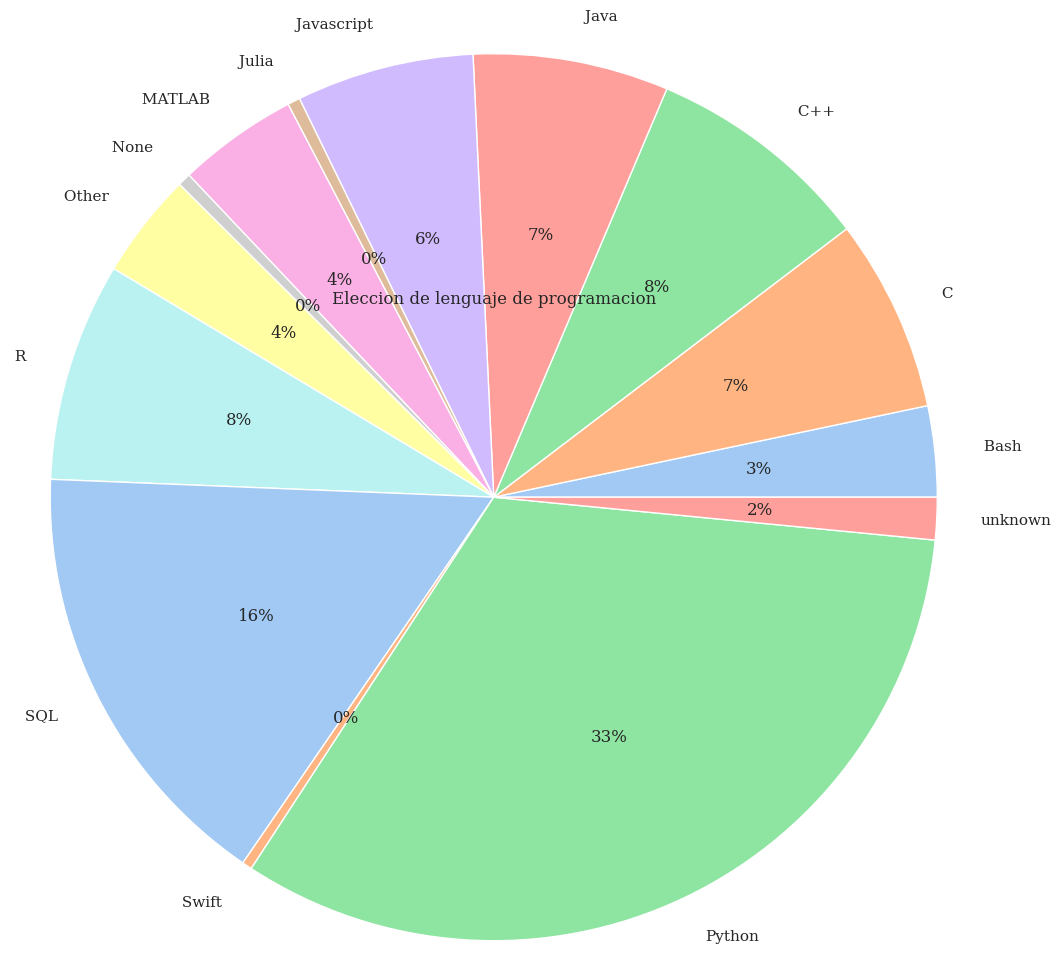

In [370]:
# Hacemos la grafica pero para el recuento total de registros respecto del explode.
plt.figure()

colors = sns.color_palette('pastel')[0:13]

plt.pie(df_group_leng['conteo_eleccion'],colors= colors, labels=df_group_leng["Lenguaje"], autopct= '%.0f%%', radius= 3)
plt.title('Eleccion de lenguaje de programacion')

plt.show();

---

        Realizamos analisis respecto a los registros del DataFrame original sin tener en cuenta el explode.


In [371]:
total=df_lenguajeprog_sinnulos.shape[0]
total

25973

In [372]:
def porcentajes (x):
    return round((x/total)*100, 2)

In [373]:
df_group_leng['porcentaje']= df_group_leng['conteo_eleccion'].apply(porcentajes)
df_group_leng

,Lenguaje,conteo_eleccion,porcentaje
0,Bash,2216,8.53
1,C,4709,18.13
2,C++,5535,21.31
3,Java,4769,18.36
4,Javascript,4332,16.68
5,Julia,305,1.17
6,MATLAB,2935,11.30
7,None,319,1.23
8,Other,2575,9.91
9,R,5334,20.54


In [374]:
df_group_leng.dtypes

Lenguaje            object
conteo_eleccion      int64
porcentaje         float64
dtype: object

#### Barplot con los porcentajes segun tipo de lenguaje de programacion

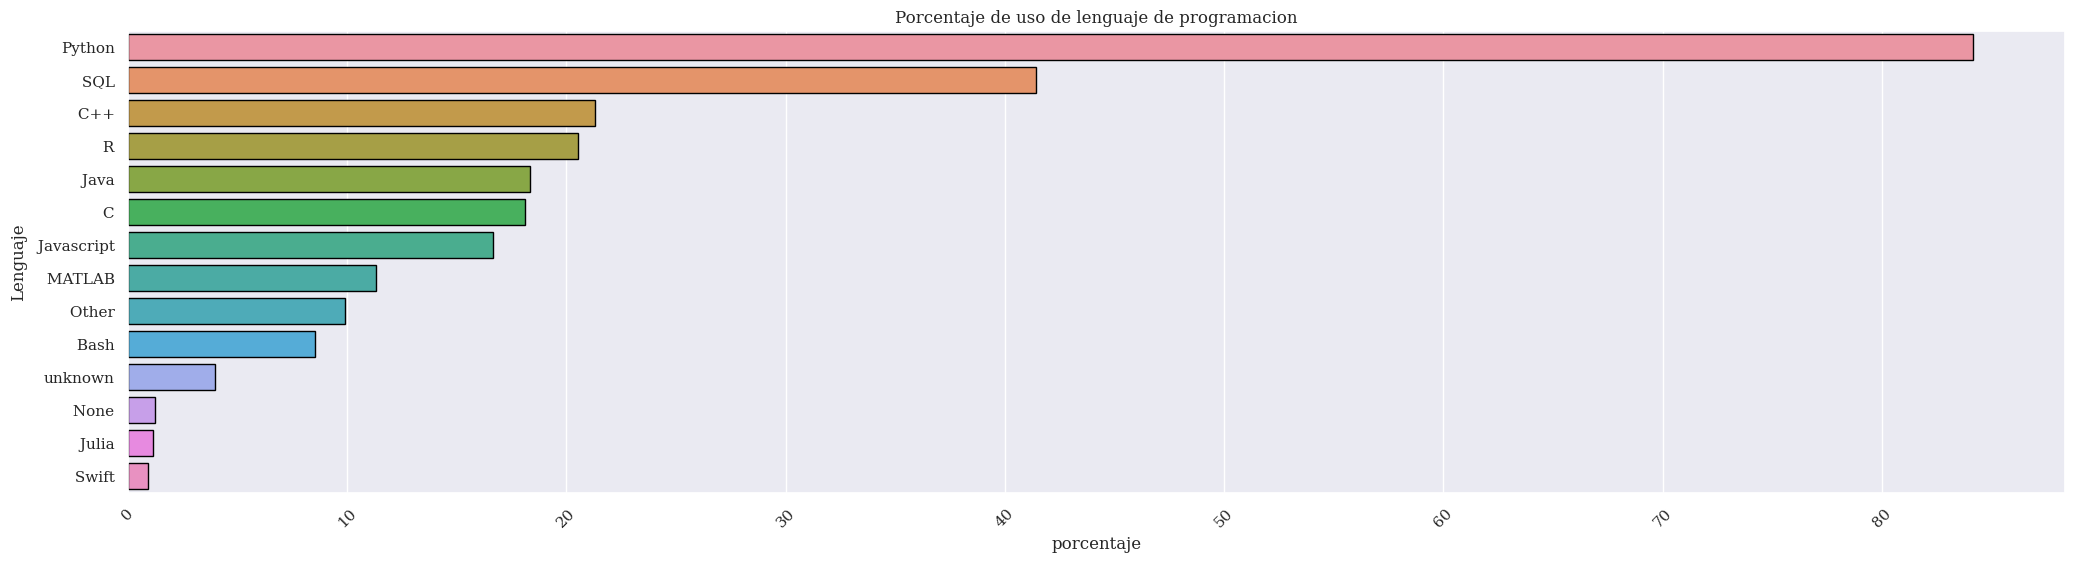

In [375]:
plt.figure( figsize=(25,6))

sns.set_color_codes("pastel")
sns.set(font = "serif")

ordenado =df_group_leng.sort_values("porcentaje", ascending=False)
fig = sns.barplot(x = 'porcentaje', y= 'Lenguaje', data = ordenado, edgecolor = 'black')

plt.title('Porcentaje de uso de lenguaje de programacion')
plt.xticks(rotation = 45)

plt.show(); 

        Vemos que realizar una comparacion entre variables categoricas con el dataframe que ya tiene agrupado por lenguaje no nos sirve, por lo que vamos a trabajar directamente sobre el df_explode que tiene todos los registros.

In [376]:
df_explode.columns

Index(['level_0', 'index', 'time', 'age', 'gender', 'pais', 'formacion',
       'puesto', 'experiencia_prog', 'lenguaje_top', 'exp_ml',
       'tamaño_empresa', 'uso_ml', 'salario', 'inversion_ml',
       'ppal_herramienta_data', 'lenguaje_prog', 'plataforma', 'plat_cursos',
       'nubes', 'plataforma_top', 'salario_max', 'Lenguaje', '1', '2', '3',
       '4', '5', '6', '7', '8', '9', '10', '11', '12'],
      dtype='object')

In [377]:
df_lenguajes=df_explode[['gender','puesto','formacion','experiencia_prog', 'Lenguaje']]
df_lenguajes

,gender,puesto,formacion,experiencia_prog,Lenguaje
0,Man,Other,Bachelor’s degree,5-10 years,Python
0,Man,Other,Bachelor’s degree,5-10 years,R
1,Man,Program/Project Manager,Master’s degree,20+ years,SQL
1,Man,Program/Project Manager,Master’s degree,20+ years,C
1,Man,Program/Project Manager,Master’s degree,20+ years,C++
...,...,...,...,...,...
25969,Man,Student,Master’s degree,1-3 years,Python
25970,Man,Research Scientist,Doctoral degree,I have never written code,unknown
25971,Man,Data Scientist,Master’s degree,5-10 years,Python
25971,Man,Data Scientist,Master’s degree,5-10 years,SQL


#### Countplot segun puesto y lenguajes de programacion

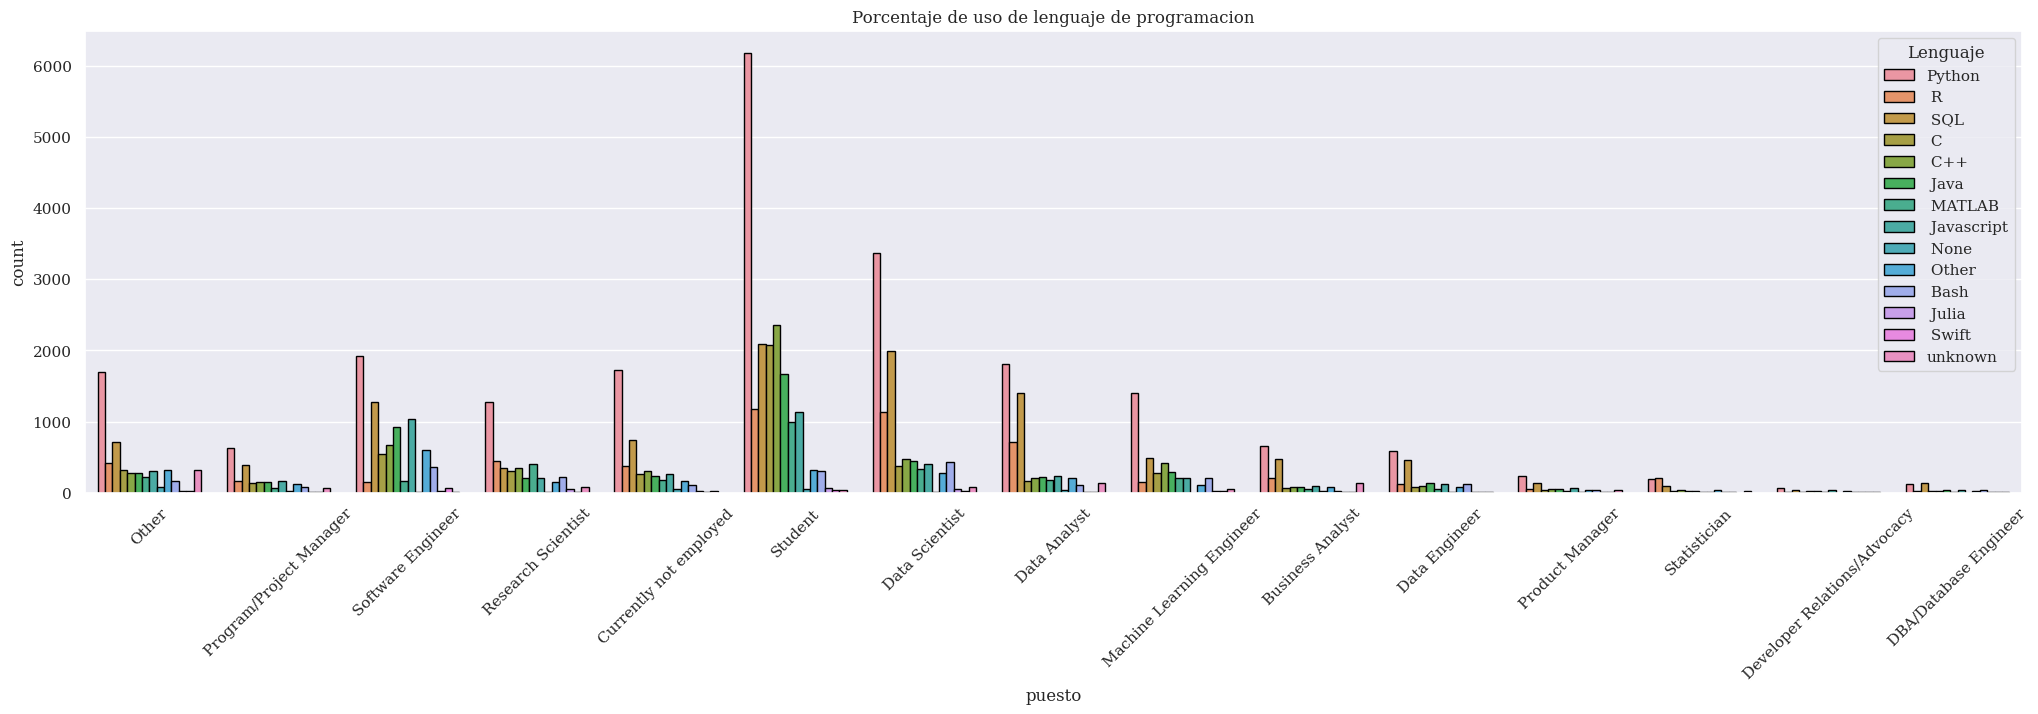

In [378]:
plt.figure( figsize=(25,6))

sns.set_color_codes("pastel")
sns.set(font = "serif")

fig = sns.countplot(x = 'puesto', data = df_lenguajes, hue= 'Lenguaje',edgecolor = 'black')

plt.title('Porcentaje de uso de lenguaje de programacion')
plt.xticks(rotation = 45)
plt.show(); 

In [379]:
lista_puesto= ['Program/Project Manager',
 'Software Engineer',
 'Research Scientist',
 'Data Scientist',
 'Data Analyst',
 'Machine Learning Engineer',
 'Business Analyst',
 'Data Engineer',
 'Product Manager',
 'Statistician',
 'Developer Relations/Advocacy',
 'DBA/Database Engineer']

In [380]:
df_puesto_filtrado = df_explode[df_explode['puesto'].isin(lista_puesto)]
df_puesto_filtrado.head(2)

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,exp_ml,tamaño_empresa,uso_ml,salario,inversion_ml,ppal_herramienta_data,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top,salario_max,Lenguaje,1,2,3,4,5,6,7,8,9,10,11,12
1,1,1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,< 1 year,"1000-9,999 employees",We are exploring ML methods (and may one day p...,60000-69999,$0 ($USD),"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook","Kaggle Learn Courses,Cloud-certification progr...",NaN,NaN,69999,SQL,SQL,C,C++,Java,None,None,None,None,None,None,None,None
1,1,1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,< 1 year,"1000-9,999 employees",We are exploring ML methods (and may one day p...,60000-69999,$0 ($USD),"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook","Kaggle Learn Courses,Cloud-certification progr...",NaN,NaN,69999,C,SQL,C,C++,Java,None,None,None,None,None,None,None,None


In [381]:
df_puesto_filtrado['puesto'].unique()

array(['Program/Project Manager', 'Software Engineer',
       'Research Scientist', 'Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Business Analyst', 'Data Engineer',
       'Product Manager', 'Statistician', 'Developer Relations/Advocacy',
       'DBA/Database Engineer'], dtype=object)

In [382]:
df['puesto'].value_counts()

Student                         6804
Data Scientist                  3616
Software Engineer               2449
Other                           2393
Data Analyst                    2301
Currently not employed          1986
Research Scientist              1538
Machine Learning Engineer       1499
Business Analyst                 968
Program/Project Manager          849
Data Engineer                    668
Product Manager                  319
Statistician                     313
DBA/Database Engineer            171
Developer Relations/Advocacy      99
Name: puesto, dtype: int64

----


#### Comenzamos a trabajar con la columna de salario 

In [383]:
df['salario'].unique()

array(['25000-29999', '60000-69999', '0-999', '30000-39999', nan,
       '15000-19999', '70000-79999', '2000-2999', '10000-14999',
       '5000-7499', '20000-24999', '1000-1999', '100000-124999',
       '7500-9999', '4000-4999', '40000-49999', '50000-59999',
       '3000-3999', '300000-499999', '200000-249999', '125000-149999',
       '250000-299999', '80000-89999', '90000-99999', '150000-199999',
       '-1000000', '500000-999999'], dtype=object)

In [384]:
df['salario']=df["salario"].str.replace(',','').str.replace('$','').str.replace('>','-') 
#Quitamos todos los simbolos que estaban por demas en el string.

/var/folders/db/hp0l5_js4yv8br5y2tc3frpm0000gn/T/ipykernel_30365/3692967412.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['salario']=df["salario"].str.replace(',','').str.replace('$','').str.replace('>','-')


In [385]:
df['salario_max']=df["salario"].str.split('-', n=1, expand=True).get(1) 
# Separamos el rango del salario para quedarnos con el mayor y poder convertir la columna en numerica

In [386]:
df['salario_max'].unique()

array(['29999', '69999', '999', '39999', None, '19999', '79999', '2999',
       '14999', '7499', '24999', '1999', '124999', '9999', '4999',
       '49999', '59999', '3999', '499999', '249999', '149999', '299999',
       '89999', '99999', '199999', '1000000', '999999'], dtype=object)

In [387]:
df[df["salario"] == "1000000"].count()

level_0                  0
index                    0
time                     0
age                      0
gender                   0
pais                     0
formacion                0
puesto                   0
experiencia_prog         0
lenguaje_top             0
exp_ml                   0
tamaño_empresa           0
uso_ml                   0
salario                  0
inversion_ml             0
ppal_herramienta_data    0
lenguaje_prog            0
plataforma               0
plat_cursos              0
nubes                    0
plataforma_top           0
salario_max              0
dtype: int64

In [388]:
print(df["salario_max"].isnull().sum())
print(df["salario"].isnull().sum())

10582
10582


In [389]:
df.dtypes

level_0                   int64
index                     int64
time                      int64
age                      object
gender                   object
pais                     object
formacion                object
puesto                   object
experiencia_prog         object
lenguaje_top             object
exp_ml                   object
tamaño_empresa           object
uso_ml                   object
salario                  object
inversion_ml             object
ppal_herramienta_data    object
lenguaje_prog            object
plataforma               object
plat_cursos              object
nubes                    object
plataforma_top           object
salario_max              object
dtype: object

In [390]:
df['salario_max']=df['salario_max'].astype("Int64", errors= 'ignore')
df['salario_max'].info

<bound method Series.info of 0        29999
1        69999
2          999
3        39999
4        39999
         ...  
25968    19999
25969     <NA>
25970      999
25971     <NA>
25972      999
Name: salario_max, Length: 25973, dtype: Int64>

In [391]:
df["salario_max"].isnull().sum()

10582

In [392]:
df_estudiantes = df[df["puesto"] == "Student"]
print(df_estudiantes.shape)
print('----------')
print(df_estudiantes["salario_max"].isnull().sum())


(6804, 22)
----------
6804


In [393]:
df_other = df[df["puesto"] == "Other"]
print(df_other.shape)
print('----------')
print(df_other["salario_max"].isnull().sum())

(2393, 22)
----------
189


In [394]:
df_desem = df[df["puesto"] == "Currently not employed"]
print(df_desem.shape)
print('----------')
print(df_desem["salario_max"].isnull().sum())

(1986, 22)
----------
1986


### Students, Others, Currently not employed, crear un df donde no los encluya para poder hacer un KNN

In [395]:
df["rango_salario"] = pd.cut(df["salario_max"], 12, right = True, labels = ["Salario muy bajo",
                "Salario bajo", "Salario bajo-medio", "Salario bajo-medio", "Salario medio", "Salario medio-alto", 
                "Salario alto", "Salario alto", "Salario muy alto", "Salario muy alto", "Salario altísimo", "Salario altísimo"], 
                ordered = False)

In [396]:
df.sample(5)

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,exp_ml,tamaño_empresa,uso_ml,salario,inversion_ml,ppal_herramienta_data,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top,salario_max,rango_salario
19990,19990,19990,575,30-34,Man,Malaysia,Bachelor’s degree,Data Analyst,5-10 years,Python,3-4 years,"10,000 or more employees","We recently started using ML methods (i.e., mo...",25000-29999,"$1000-$9,999","Local development environments (RStudio, Jupyt...","Python, SQL","Notepad++,Jupyter Notebook","edX,Kaggle Learn Courses,Udacity",I do not share my work publicly,NaN,29999,Salario muy bajo
25782,25782,25782,1090,25-29,Man,"Iran, Islamic Republic of...",Master’s degree,Data Scientist,1-3 years,Python,< 1 year,0-49 employees,No (we do not use ML methods),0-999,$0 ($USD),NaN,Python,Other,Other,NaN,NaN,999,Salario muy bajo
20874,20874,20874,511,18-21,Man,India,Bachelor’s degree,Student,1-3 years,Python,1-2 years,NaN,NaN,NaN,NaN,NaN,"Python, C++","Visual Studio Code (VSCode) ,Jupyter Notebook",NaN,NaN,NaN,<NA>,NaN
5026,5026,5026,1021,30-34,Man,Ghana,Bachelor’s degree,Data Scientist,< 1 years,Python,1-2 years,0-49 employees,I do not know,0-999,$100-$999,"Basic statistical software (Microsoft Excel, G...",Python,Jupyter Notebook,None,I do not share my work publicly,They all had a similarly enjoyable developer e...,999,Salario muy bajo
14050,14050,14050,502,45-49,Man,United States of America,Doctoral degree,Other,I have never written code,NaN,NaN,"10,000 or more employees",I do not know,100000-124999,$1-$99,"Basic statistical software (Microsoft Excel, G...",NaN,NaN,Kaggle Learn Courses,NaN,NaN,124999,Salario bajo


In [397]:
df_salarios_pais= pd.DataFrame(df.groupby(['pais','gender', 'puesto'])['salario_max'].mean().round(2))

#### Importamos libreria AWOC para trabajar con los paises 

-----


### COMO SEPARAR POR EUROPA EN UNA COLUMNA 

In [398]:
pip install a-world-of-countries #Instalacion de libreria

Note: you may need to restart the kernel to use updated packages.


In [399]:
# Import the AWOC package.
import awoc

# Initialize the AWOC class.
my_world = awoc.AWOC()

In [400]:
europa= my_world.get_countries_list_of('Europe')
europa


['Albania',
 'Andorra',
 'Austria',
 'Belarus',
 'Belgium',
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'Faroe Islands',
 'Finland',
 'France',
 'Germany',
 'Gibraltar',
 'Greece',
 'Guernsey',
 'Hungary',
 'Iceland',
 'Ireland',
 'Isle of Man',
 'Italy',
 'Jersey',
 'Kosovo',
 'Latvia',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Macedonia',
 'Malta',
 'Moldova',
 'Monaco',
 'Montenegro',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'San Marino',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Svalbard and Jan Mayen',
 'Sweden',
 'Switzerland',
 'Ukraine',
 'United Kingdom',
 'Vatican']

In [401]:
df['pais']
europa

['Albania',
 'Andorra',
 'Austria',
 'Belarus',
 'Belgium',
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'Faroe Islands',
 'Finland',
 'France',
 'Germany',
 'Gibraltar',
 'Greece',
 'Guernsey',
 'Hungary',
 'Iceland',
 'Ireland',
 'Isle of Man',
 'Italy',
 'Jersey',
 'Kosovo',
 'Latvia',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Macedonia',
 'Malta',
 'Moldova',
 'Monaco',
 'Montenegro',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'San Marino',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Svalbard and Jan Mayen',
 'Sweden',
 'Switzerland',
 'Ukraine',
 'United Kingdom',
 'Vatican']

In [402]:
df['europa']= 'NO'
for x in df['pais'].unique():
    if x in europa: 
        df.loc[df['pais'] == x, ['europa']] = 'SI'
            #print ('YES')


In [403]:
df.sample(5)

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,exp_ml,tamaño_empresa,uso_ml,salario,inversion_ml,ppal_herramienta_data,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top,salario_max,rango_salario,europa
14708,14708,14708,512,35-39,Man,United States of America,Master’s degree,Currently not employed,20+ years,Java,10-20 years,NaN,NaN,NaN,NaN,"Basic statistical software (Microsoft Excel, G...",R,Vim / Emacs,"Udemy,LinkedIn Learning,University Courses (re...",NaN,NaN,<NA>,NaN,NO
3395,3395,3395,597,30-34,Woman,India,I prefer not to answer,Data Analyst,1-3 years,Python,2-3 years,0-49 employees,We use ML methods for generating insights (but...,NaN,NaN,NaN,"Python, C, MATLAB",Visual Studio Code (VSCode),NaN,NaN,NaN,<NA>,NaN,NO
1681,1681,1681,1120,30-34,Man,India,Bachelor’s degree,Data Analyst,1-3 years,Python,< 1 year,50-249 employees,"We have well established ML methods (i.e., mod...",4000-4999,$100-$999,"Basic statistical software (Microsoft Excel, G...","Python, R","RStudio ,Visual Studio Code (VSCode) ,PyCharm ...","Udacity,Udemy,Other",GitHub,NaN,4999,Salario muy bajo,NO
2618,2618,2618,176,18-21,Man,India,Bachelor’s degree,Student,< 1 years,Python,NaN,NaN,NaN,NaN,NaN,NaN,"Python, C",Visual Studio Code (VSCode),NaN,NaN,NaN,<NA>,NaN,NO
811,811,811,519,40-44,Woman,Mexico,Bachelor’s degree,Other,I have never written code,NaN,NaN,250-999 employees,We are exploring ML methods (and may one day p...,10000-14999,"$1000-$9,999","Business intelligence software (Salesforce, Ta...",NaN,NaN,University Courses (resulting in a university ...,NaN,NaN,14999,Salario muy bajo,NO


In [404]:
df_europa = df[df['europa']=='SI']
df_europa.head(3)

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,exp_ml,tamaño_empresa,uso_ml,salario,inversion_ml,ppal_herramienta_data,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top,salario_max,rango_salario,europa
8,8,8,1744,22-24,Man,Russia,Bachelor’s degree,Currently not employed,3-5 years,Python,< 1 year,NaN,NaN,NaN,NaN,"Basic statistical software (Microsoft Excel, G...","Python, SQL",Other,Kaggle Learn Courses,NaN,NaN,<NA>,NaN,SI
15,15,15,563,35-39,Man,Greece,Doctoral degree,Research Scientist,10-20 years,Python,4-5 years,50-249 employees,We use ML methods for generating insights (but...,10000-14999,$0 ($USD),"Local development environments (RStudio, Jupyt...","Python, C, C++, MATLAB",Spyder,"Udacity,University Courses (resulting in a uni...",NaN,NaN,14999,Salario muy bajo,SI
16,16,16,1315,50-54,Man,Belgium,Bachelor’s degree,Data Analyst,20+ years,Python,1-2 years,"1000-9,999 employees",We are exploring ML methods (and may one day p...,2000-2999,$0 ($USD),"Local development environments (RStudio, Jupyt...","Python, SQL","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Kaggle Learn Courses,Cloud-certification progr...",NaN,NaN,2999,Salario muy bajo,SI


In [405]:
df['pais'].unique()

array(['India', 'Indonesia', 'Pakistan', 'Mexico', 'Russia', 'Turkey',
       'Australia', 'Nigeria', 'Greece', 'Belgium', 'Japan', 'Egypt',
       'Singapore', 'Brazil', 'Poland', 'China',
       'Iran, Islamic Republic of...', 'United States of America',
       'Italy', 'Viet Nam', 'Israel', 'Peru', 'South Africa', 'Other',
       'Spain', 'Bangladesh',
       'United Kingdom of Great Britain and Northern Ireland', 'France',
       'Switzerland', 'Algeria', 'Tunisia', 'Argentina', 'Sweden',
       'Colombia', 'I do not wish to disclose my location', 'Canada',
       'Chile', 'Netherlands', 'Ukraine', 'Saudi Arabia', 'Romania',
       'Morocco', 'Austria', 'Taiwan', 'Kenya', 'Belarus', 'Ireland',
       'Portugal', 'Hong Kong (S.A.R.)', 'Denmark', 'Germany',
       'South Korea', 'Philippines', 'Sri Lanka', 'United Arab Emirates',
       'Uganda', 'Ghana', 'Malaysia', 'Thailand', 'Nepal', 'Kazakhstan',
       'Ethiopia', 'Iraq', 'Ecuador', 'Norway', 'Czech Republic'],
      dtype=obje

In [406]:
df_europa['pais'].unique()

array(['Russia', 'Greece', 'Belgium', 'Poland', 'Italy', 'Spain',
       'France', 'Switzerland', 'Sweden', 'Netherlands', 'Ukraine',
       'Romania', 'Austria', 'Belarus', 'Ireland', 'Portugal', 'Denmark',
       'Germany', 'Norway', 'Czech Republic'], dtype=object)

In [407]:
df['europa'].unique()

array(['NO', 'SI'], dtype=object)

----

#### Próximos objetivos:
- Filtrar por todos los países de Europa, para realizar el analisis, según genero, salario, puesto, formación.
- Terminar de acordar los dataframes a las preguntas
- Elaborar las conclusiones de cada pregunta
- Organizar los archivos por preguntas (por ejemplo) o por tipo (EDA o limpieza) y hacer el README
- Presentación, plasmar tipo de idea ¨empresa de venta programas¨

### - ¿Cual es el ratio de hombres y mujeres segun el perfil? (posibilidad nivel mundial)
- Columnas que toca:
        - gender= no tiene nulos asique esta lista, verificar unique para descartar que no tenga cosas raras.
        - puesto = tampoco tiene nulos, ver uniques y ver si recategorizamos por menos cantidades.
        - formacion = tampoco tiene nulos, ver uniques y ver si recategorizamos  ver que hacemos con los estudiantes y otros.
### - ¿Cual es perfil educativo para cada puesto? (Europa)
- Columnas que toca:
    - puesto = no tiene nulos ver si categorizamos mejor o si nos enfocamos en uno en particular.
    - formacion= no tiene nulos, ver que hacer con studens o los que no respondieron.
Ver si damos vuelta de rosca y lo profundizamos mas para mujeres y un pais o continente especifico!
### - Herramientas mas utilizadas segun los perfiles. (leguaje_prog y plataforma)(Europa)
- Columnas que toca:
    - ppal_herramienta_data: tiene muchos muchos nulos, ver si podemos aplicar alguno de los metodos de imputer para solucionarlo o en el caso que lo sesgemos solo para un area especifica volver a verificar nulos ahi.
    - puesto = no tiene nulos, ver lo de la recategorizacion
Me parece interesante poder mezclar esta pregunta con otras dos columnas mas como son lenguaje_prog y plataforma para poder tener el combo de todo lo que se usa en ese area.
### - ¿Cuál es la diferencia de salarios entre hombres y mujeres segun el perfil? 
- Columnas que toca:
    - gender: no tiene nulos
    - salarios : poder hacer analisis de numeros con medias y demas segun genero.. verificar que cantidad de datos de hombre y mujer hay en el dataframe para jugar un poco con la poderacion.
### - Perfil segun pais que herramientas usan, en coparativa con España.
- Columnas que toca:
    -pais: no tiene nulos, los vamos a fraccionar y analizar solo algunos?
    -herramientas de trabajo tenemos que alinearlo con  loque hagamos con los paises y demas preguntas.
Extras:
- ¿Cómo se distribuye este porcentaje segun los paises?

In [408]:
df.head(2)

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,exp_ml,tamaño_empresa,uso_ml,salario,inversion_ml,ppal_herramienta_data,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top,salario_max,rango_salario,europa
0,0,0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,50-249 employees,No (we do not use ML methods),25000-29999,$100-$999,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"edX,Kaggle Learn Courses,DataCamp,Udacity,Udemy","GitHub , Kaggle",NaN,29999,Salario muy bajo,NO
1,1,1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,< 1 year,"1000-9,999 employees",We are exploring ML methods (and may one day p...,60000-69999,$0 ($USD),"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook","Kaggle Learn Courses,Cloud-certification progr...",NaN,NaN,69999,Salario muy bajo,NO


In [409]:
df.shape

(25973, 24)

In [410]:
df['nubes'].unique()

array([' GitHub , Kaggle ', nan, 'I do not share my work publicly',
       ' Kaggle ', ' GitHub , Kaggle , Colab ', 'Other',
       ' Streamlit , GitHub , Personal blog , Kaggle , Colab ',
       ' GitHub ', ' Colab ', ' Kaggle , Colab ',
       ' Streamlit , NBViewer ', ' GitHub , Personal blog ',
       ' Personal blog ', ' NBViewer , GitHub , Kaggle , Colab ',
       ' GitHub , Personal blog , Shiny ',
       ' GitHub , Personal blog , Colab ', ' Streamlit , GitHub ',
       ' GitHub ,Other', ' GitHub , Colab ',
       ' Streamlit , GitHub , Colab , Shiny ',
       ' NBViewer , GitHub , Colab ', ' Streamlit ',
       ' Streamlit , GitHub , Kaggle , Colab ',
       ' Streamlit , GitHub , Personal blog ',
       ' Streamlit , GitHub , Kaggle ', ' Personal blog , Kaggle ',
       ' Streamlit , Shiny ', ' GitHub , Personal blog , Kaggle , Colab ',
       ' GitHub , Shiny ', ' GitHub , Personal blog , Kaggle ',
       ' Streamlit , NBViewer , GitHub , Personal blog , Kaggle , Colab , Shi

In [411]:
df["nubes"].replace(np.nan,"unknown",inplace=True)

In [412]:
df['nubes']= df["nubes"].apply(lambda x: x.strip())

In [424]:
df['nubes']= df["nubes"].apply(lambda x: x.join)

In [425]:
df['nubes'].unique()

array([<built-in method join of str object at 0x7f7b1d11feb0>,
       <built-in method join of str object at 0x7f7b281306f0>,
       <built-in method join of str object at 0x7f7b1d7218f0>, ...,
       <built-in method join of str object at 0x7f7b0eb67c10>,
       <built-in method join of str object at 0x7f7b0ebd1c30>,
       <built-in method join of str object at 0x7f7b0ebd10b0>],
      dtype=object)

In [414]:
df['nubes_lista']= df["nubes"].apply(lambda x: x.split(','))

In [415]:
df["lenguaje_prog"].replace(np.nan,"unknown",inplace=True)# Convertimos los nulos de la columna 'lenguaje_prog' a "unknown"

In [416]:
df['Lenguaje']= df["lenguaje_prog"].apply(lambda x: x.split(',')) #Generamos una columna nueva de lenguaje con la lista de las opciones elegidas por cada registro

In [417]:
df["plataforma"].replace(np.nan,"unknown",inplace=True)

In [418]:
df['plataforma']= df["plataforma"].apply(lambda x: x.strip())

In [419]:
df['plataforma_lista']= df["plataforma"].apply(lambda x: x.split(','))

In [420]:
df.head()

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,exp_ml,tamaño_empresa,uso_ml,salario,inversion_ml,ppal_herramienta_data,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top,salario_max,rango_salario,europa,nubes_lista,Lenguaje,plataforma_lista
0,0,0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,50-249 employees,No (we do not use ML methods),25000-29999,$100-$999,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"edX,Kaggle Learn Courses,DataCamp,Udacity,Udemy","GitHub , Kaggle",NaN,29999,Salario muy bajo,NO,"[GitHub , Kaggle]","[Python, R]",[Vim / Emacs]
1,1,1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,< 1 year,"1000-9,999 employees",We are exploring ML methods (and may one day p...,60000-69999,$0 ($USD),"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook","Kaggle Learn Courses,Cloud-certification progr...",unknown,NaN,69999,Salario muy bajo,NO,[unknown],"[ SQL, C, C++, Java]","[Notepad++, Jupyter Notebook]"
2,2,2,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,I do not use machine learning methods,"1000-9,999 employees",I do not know,0-999,$0 ($USD),"Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",DataCamp,I do not share my work publicly,NaN,999,Salario muy bajo,NO,[I do not share my work publicly],"[Python, C++, Java]","[PyCharm , Jupyter Notebook, Other]"
3,3,3,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,5-10 years,"1000-9,999 employees",I do not know,30000-39999,$0 ($USD),"Local development environments (RStudio, Jupyt...",Python,"Spyder,Jupyter Notebook",edX,unknown,NaN,39999,Salario muy bajo,NO,[unknown],[Python],"[Spyder, Jupyter Notebook]"
4,4,4,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,10-20 years,50-249 employees,We use ML methods for generating insights (but...,30000-39999,"$1000-$9,999","Local development environments (RStudio, Jupyt...","Python, C, MATLAB","Spyder,MATLAB ,Jupyter Notebook","Kaggle Learn Courses,Udemy",I do not share my work publicly,NaN,39999,Salario muy bajo,NO,[I do not share my work publicly],"[Python, C, MATLAB]","[Spyder, MATLAB , Jupyter Notebook]"


In [422]:
df.to_pickle('data/data_final.pickle')